In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import clean

In [5]:
### This is the function you should be running
### Process of Unpacking and Cleaning is Below
df = clean.clean_df("gen8ou-0.json", 8, "OU")
df

,Moves,Usage,Gen,Format
Landorus-Therian,"[earthquake, uturn, stealthrock, knockoff, tox...",0.304108,8,OU
Blissey,"[softboiled, seismictoss, toxic, teleport, thu...",0.084829,8,OU
Slowbro,"[scald, teleport, slackoff, futuresight, icebe...",0.057747,8,OU
Crawdaunt,"[aquajet, knockoff, crabhammer, swordsdance, c...",0.028303,8,OU
Urshifu-Rapid-Strike,"[surgingstrikes, closecombat, aquajet, uturn, ...",0.129478,8,OU
...,...,...,...,...
Arctozolt,"[boltbeak, lowkick, blizzard, substitute, free...",0.026643,8,OU
Melmetal,"[doubleironbash, thunderpunch, earthquake, ice...",0.092703,8,OU
Mew,"[taunt, stealthrock, spikes, icebeam, roost, s...",0.060138,8,OU
Hippowdon,"[earthquake, slackoff, stealthrock, toxic, whi...",0.042812,8,OU


In [3]:
### Reading the JSON file, JSON File must be in the same folder as your Notebook
raw = pd.read_json("gen8ou-0.json")
df = raw[raw['data'].notna()]['data']
df.head()

,info,data
team type,None,NaN
cutoff,0.0,NaN
cutoff deviation,0,NaN
metagame,gen8ou,NaN
number of battles,1467367,NaN
...,...,...
Shedinja,NaN,"{'Moves': {'': 578.0, 'absorb': 11.0, 'falsesw..."
Wishiwashi,NaN,"{'Moves': {'': 67.0, 'liquidation': 393.0, 'be..."
Sneasel,NaN,"{'Moves': {'counter': 3.0, 'beatup': 9.0, 'bli..."
Hitmontop,NaN,"{'Moves': {'': 208.0, 'detect': 89.0, 'quickgu..."


In [13]:
### Extracting Moves
mime_moves = df[0]['Moves']
mime_moves.keys()

dict_keys(['', 'healingwish', 'blizzard', 'teeterdance', 'foulplay', 'focuspunch', 'hail', 'expandingforce', 'avalanche', 'iciclespear', 'grassknot', 'fakeout', 'icebeam', 'storedpower', 'attract', 'freezedry', 'substitute', 'trick', 'copycat', 'iceshard', 'stompingtantrum', 'hypnosis', 'calmmind', 'psychic', 'thunderwave', 'psyshock', 'shadowball', 'toxic', 'energyball', 'skillswap', 'suckerpunch', 'dazzlinggleam', 'icywind', 'icepunch', 'thunderbolt', 'zenheadbutt', 'trickroom', 'taunt', 'mirrorcoat', 'nastyplot', 'psybeam', 'reflect', 'raindance', 'bodyslam', 'rest', 'magiccoat', 'thunder', 'lightscreen', 'infestation', 'powersplit', 'protect', 'confuseray', 'guardswap', 'metronome', 'futuresight', 'focusblast', 'irondefense', 'drainpunch', 'uproar', 'chargebeam', 'roleplay', 'rapidspin', 'tripleaxel', 'encore'])

In [14]:
### Extracting Move Counts
count = list(mime_moves.values())
count[:5]

[32.0, 226.0, 48.0, 4.0, 1.0]

<AxesSubplot:ylabel='Count'>

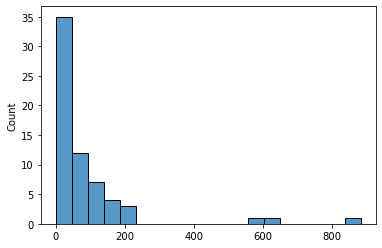

In [15]:
### Distribution of Move Counts
sns.histplot(count)

In [16]:
### Finds how many Moves are above 200 count
sum(pd.Series(count) > 200)

6

In [17]:
### Alternatively, divide move counts by percentiles, where 25% of moves are below 5.75 and 25% of moves are above 103 
percent_moves = np.percentile(count, [0,25,50,75,100])
percent_moves

array([  1.  ,   5.75,  28.5 , 103.  , 884.  ])

In [19]:
### Let's Extract Top 6 Moves
top_moves = {}
for key in mime_moves:
    if mime_moves[key] > percent_moves[3]:
        top_moves[key] = mime_moves[key]

top_6 = list(dict(sorted(top_moves.items(), key=lambda item: item[1], reverse=True)))[:6]
top_6


['freezedry', 'rapidspin', 'psychic', 'healingwish', 'nastyplot', 'icebeam']

In [23]:
### Finding Pokemon above 2% Usage
top_mons = {}
ix = list(df.index)

for row in range(len(df)):
    if df[row]['usage'] >= .02:
        top_mons[ix[row]] = df[row]
    
top_mons.keys()

dict_keys(['Landorus-Therian', 'Blissey', 'Slowbro', 'Crawdaunt', 'Urshifu-Rapid-Strike', 'Tapu Koko', 'Torkoal', 'Tapu Fini', 'Rillaboom', 'Aegislash', 'Clefable', 'Latios', 'Hatterene', 'Azumarill', 'Jirachi', 'Hydreigon', 'Bisharp', 'Kyurem', 'Togekiss', 'Venusaur', 'Dracozolt', 'Blacephalon', 'Heatran', 'Regieleki', 'Slowking', 'Hawlucha', 'Grimmsnarl', 'Gengar', 'Tapu Lele', 'Weavile', 'Mandibuzz', 'Volcarona', 'Swampert', 'Blaziken', 'Ferrothorn', 'Zapdos-Galar', 'Toxapex', 'Magnezone', 'Mamoswine', 'Chansey', 'Buzzwole', 'Rotom-Wash', 'Dragonite', 'Dragapult', 'Excadrill', 'Zeraora', 'Corviknight', 'Volcanion', 'Scizor', 'Nidoking', 'Zapdos', 'Tyranitar', 'Tornadus-Therian', 'Ninetales-Alola', 'Kartana', 'Slowking-Galar', 'Skarmory', 'Barraskewda', 'Garchomp', 'Victini', 'Cloyster', 'Arctozolt', 'Melmetal', 'Mew', 'Hippowdon', 'Pelipper'])

In [24]:
### Putting Everything Together
to_df = {}
for key in top_mons:
    mon = top_mons[key]
    top_6 = list(dict(sorted(mon['Moves'].items(), key=lambda item: item[1], reverse=True)))[:6]
    to_df[key] = [top_6, top_mons[key]['usage']]
    
to_df['Landorus-Therian']

[['earthquake', 'uturn', 'stealthrock', 'knockoff', 'toxic', 'defog'],
 0.304108]

In [25]:
pd.DataFrame.from_dict(to_df, orient = 'index')

,0,1
Landorus-Therian,"[earthquake, uturn, stealthrock, knockoff, tox...",0.304108
Blissey,"[softboiled, seismictoss, toxic, teleport, thu...",0.084829
Slowbro,"[scald, teleport, slackoff, futuresight, icebe...",0.057747
Crawdaunt,"[aquajet, knockoff, crabhammer, swordsdance, c...",0.028303
Urshifu-Rapid-Strike,"[surgingstrikes, closecombat, aquajet, uturn, ...",0.129478
...,...,...
Arctozolt,"[boltbeak, lowkick, blizzard, substitute, free...",0.026643
Melmetal,"[doubleironbash, thunderpunch, earthquake, ice...",0.092703
Mew,"[taunt, stealthrock, spikes, icebeam, roost, s...",0.060138
Hippowdon,"[earthquake, slackoff, stealthrock, toxic, whi...",0.042812
